<a href="https://colab.research.google.com/github/bbouya/Traffic_Sign_Classification/blob/main/Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imaginationnano","key":"e70d1eb31f1be889159f68acc96f3cb8"}'}

In [4]:
# we will start connecting to our kaggle API acounts
!pip install -q kaggle
#installing kaggle using API

In [5]:
#The kaggle API client expect this files to be in ~/.kaggle
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
#Creating a folder  and changing the curent working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset


/content/traffic_sign_dataset


In [7]:
%ls

In [8]:
#Searching for a dataset in kaggle
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          41951  
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           6762  
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            220  
valentynsichkar/traffic-signs-1-million-images-for-classification  Traffic Signs 1 million images for Classification   20GB  2021-02-08 16:45:43            161  
valentynsichkar/preprocessed

In [19]:
!mkdir traffic_sign_dataset

%cd traffic_sign_dataset/

/root/traffic_sign_dataset


In [20]:
# Dawnloading kaggle for the requied dataset using search option.we can also use different search options like searching competitions, notebooks, kernels, datasets, etc
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


 97% 594M/612M [00:17<00:00, 26.5MB/s]
100% 612M/612M [00:17<00:00, 36.6MB/s]


In [21]:
#After searching the data next step would be dawnloading the data into collab notebook using refereence found in search option
%cd 

/root


In [22]:
# Unzipping

%cd traffic_sign_dataset/
!unzip gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00024.png 

In [65]:
%ls

gtsrb-german-traffic-sign.zip


/root


In [23]:
#after we unzip the file from the dataset.zip 
#Importation the library to start preprocessing the data
import os 
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D

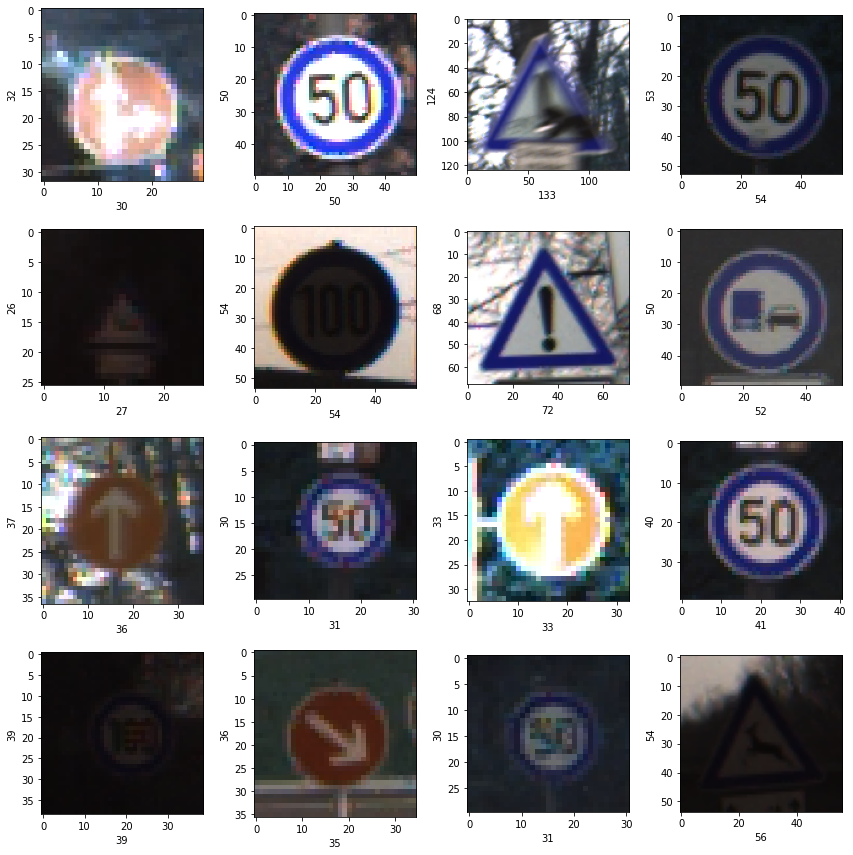

In [24]:
# Plotting 12 Images to chack dataset
import cv2
plt.figure(figsize=(12,12))
path = 'traffic_sign_dataset/Test'

for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = cv2.imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)# width image
  plt.ylabel(rand_img.shape[0], fontsize = 10)# height of image



In [25]:
# As size of image are different we have to make them equal so we will take mean of dimansions

dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = cv2.imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])


In [26]:
dim1[:10]

[44, 34, 31, 41, 47, 61, 26, 80, 30, 71]

In [27]:
dim2[:10]

[44, 34, 32, 40, 45, 56, 27, 76, 28, 66]

In [28]:
#printing the mean of each dimension:
print("Dimension 1 Mean : ",np.mean(dim1))
print("Dimenson 2 Mean : ", np.mean(dim2))

Dimension 1 Mean :  50.328929582493814
Dimenson 2 Mean :  50.83587951745773


:# For further processing we will require the images of the same dimension, So. we will start the dimension of all the images from training dataset from all 43 classses
# Now we will find out the mean value of both the dimension and analyse them, Here, we can see that (50,50) is the average shape for all the iamges


In [29]:
#Now we will reshape the images to 50,50
images =[]
labels_id = []
for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    labels_id.append(i)
  

In [30]:
images[1].shape
type(images)

list

In [31]:
#Converting images into numpy array
images = np.array(images)

In [32]:
images.shape

(39209, 50, 50, 3)

In [33]:
#The pixel values of each images ranges between 0 and 255 
# Deviding our array.np images by 255 the value will be between 0 and 1.
images = images /255

In [34]:
images[1].shape

(50, 50, 3)

In [35]:
#even the labels need to be converte to numpy.array
labels_id  = np.array(labels_id)

In [36]:
labels_id.shape

(39209,)

In [37]:
#Visualize the number of classes count
labels_count = pd.DataFrame(labels_id).value_counts()
labels_count.describe()

count      43.000000
mean      911.837209
std       695.856715
min       210.000000
25%       345.000000
50%       600.000000
75%      1425.000000
max      2250.000000
dtype: float64

Now we will observe images per class for checking whether the data is balanced or not. From the result we can say that data is balanced


In [38]:
#split our data to 
x_train,x_val ,y_train,y_val = train_test_split(images,labels_id, test_size=0.2 , random_state = 42)

The next setp would be to splity the data into training and validation with 80% of training data ana the 20% of validation data

In [39]:
#keras has built  in function for one- hot  encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [40]:

type(y_train_cat)

numpy.ndarray

In [41]:
print(y_train_cat.shape)
print(y_train.shape)
y_train_cat[1]

(31367, 43)
(31367,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = x_train.shape[1:], activation='relu' , padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters= 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))




Defining the model archetecture in this we will define all the layers with their input shape kernel size, activation, etc.



In [43]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [44]:
model.fit(x_train,y_train,epochs=	10,batch_size=128,validation_data=(x_val,y_val), verbose= 2 )

Epoch 1/10
246/246 - 16s - loss: 2.4559 - accuracy: 0.3284 - val_loss: 1.2093 - val_accuracy: 0.7077 - 16s/epoch - 67ms/step
Epoch 2/10
246/246 - 7s - loss: 1.1355 - accuracy: 0.6443 - val_loss: 0.4891 - val_accuracy: 0.8970 - 7s/epoch - 27ms/step
Epoch 3/10
246/246 - 7s - loss: 0.7426 - accuracy: 0.7619 - val_loss: 0.2610 - val_accuracy: 0.9528 - 7s/epoch - 27ms/step
Epoch 4/10
246/246 - 7s - loss: 0.5801 - accuracy: 0.8117 - val_loss: 0.2098 - val_accuracy: 0.9668 - 7s/epoch - 27ms/step
Epoch 5/10
246/246 - 7s - loss: 0.4830 - accuracy: 0.8456 - val_loss: 0.1257 - val_accuracy: 0.9728 - 7s/epoch - 27ms/step
Epoch 6/10
246/246 - 7s - loss: 0.4245 - accuracy: 0.8623 - val_loss: 0.1071 - val_accuracy: 0.9793 - 7s/epoch - 27ms/step
Epoch 7/10
246/246 - 7s - loss: 0.3758 - accuracy: 0.8788 - val_loss: 0.1052 - val_accuracy: 0.9806 - 7s/epoch - 27ms/step
Epoch 8/10
246/246 - 7s - loss: 0.3409 - accuracy: 0.8883 - val_loss: 0.0845 - val_accuracy: 0.9843 - 7s/epoch - 27ms/step
Epoch 9/10
246

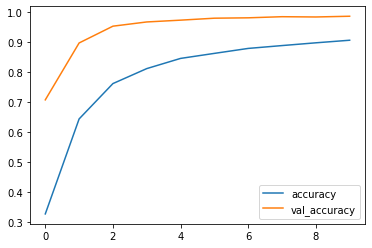

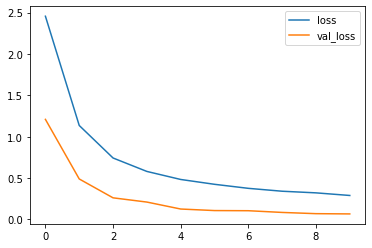

In [46]:
evaluation  = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()